In [17]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

<!-- Loading an Image (cv2.imread('lane2.jpeg')): -->
    The cv2.imread() function reads an image from a file.
    In your case, it reads an image named 'lane2.jpeg'.

<!-- Image Dimensions (height and width): -->
  You calculate the height and width of the loaded image using image.shape.
  height stores the height (number of rows) of the image.
  width stores the width (number of columns) of the image.

<!-- Creating a Copy of the Image (img=np.copy(image)): -->
  You create a copy of the original image using np.copy(image).
  This ensures that any modifications you make won’t affect the original image.

<!-- Region of Interest (ROI) Masking: -->
  The region_of_interest function masks out a region of interest in the image.
  It takes two parameters:
   img: The input image.
   vertices: A list of vertices defining the region of interest (usually a polygon).
  The function creates a black mask with the same dimensions as the input image.
  It fills the specified polygon defined by vertices with white (255) in the mask.
  The result is a masked image where only the region of interest is visible.

<!-- Canny Edge Detection (cv2.Canny(gray, 100, 200)): -->
  You convert the original image to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).
  Then, you apply the Canny edge detection algorithm using cv2.Canny().
  The parameters 100 and 200 control the lower and upper thresholds for edge detection.
  The output is an image with detected edges.

<!-- Applying the ROI Mask to the Canny Image: -->
  You apply the previously defined region of interest mask to the Canny edge-detected image using region_of_interest(canny, np.array([region_of_interest_vertices], np.int32)).
  The result is a cropped image containing only the edges within the specified region of interest.

<!-- Displaying the Cropped Image (plt.imshow(cropped_image)): -->
  Finally, you use Matplotlib to display the cropped image.



1. **Loading an Image**: You load an image named "lane2.jpeg" using OpenCV's `cv2.imread()` function.
2. **Image Dimensions**: You determine the height and width of the loaded image.
3. **Region of Interest (ROI)**: You define a region of interest (ROI) by specifying vertices. The vertices form a triangular mask that will be used to extract relevant features from the image.
4. **Grayscale Conversion**: You convert the loaded image to grayscale using `cv2.cvtColor()`.
5. **Edge Detection (Canny)**: You apply the Canny edge detection algorithm to the grayscale image using `cv2.Canny()`.
6. **Masking**: You create a masked image by applying the triangular mask (defined by the ROI vertices) to the edge-detected image using `region_of_interest()`.
7. **Display**: Finally, you display the masked image using `plt.imshow()`.


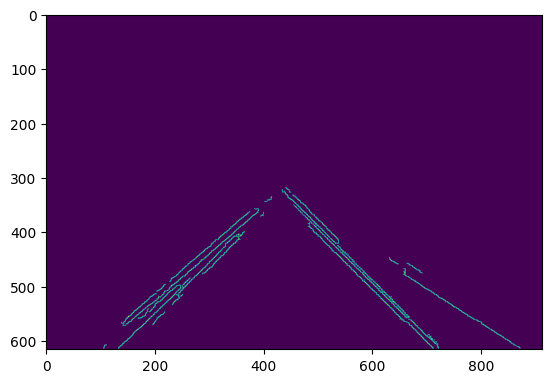

In [18]:
import cv2
import numpy as np
import  matplotlib.pylab as plt
image=cv2.imread('lane.jpeg.png')
height=image.shape[0]
width=image.shape[1]
img=np.copy(image)
def region_of_interst(img,vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),]
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny=cv2.Canny(gray,100,200)
cropped_image = region_of_interst(canny,np.array([region_of_interest_vertices],np.int32))
plt.imshow(cropped_image)


# Edge detection
Different edge detection is applied

1. Laplacian edge detection
2. Sobel method
3. Canny edge detection

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# read the image
img1 = cv2.imread('lane2.jpeg.png',0)


1. **Gaussian Blur**:
   - You apply a Gaussian blur to the image `img1` using `cv2.GaussianBlur(img1, (3, 3), 0)`. The `(3, 3)` specifies the kernel size, and `0` indicates the standard deviation of the Gaussian kernel.
   - The Gaussian blur helps reduce noise and smooths the image.

2. **Laplacian Filter**:
   - You then convolve the blurred image (`img`) with the Laplacian kernel using `cv2.Laplacian(img, cv2.CV_64F)`.
   - The Laplacian filter highlights edges and abrupt intensity changes in the image.

3. **Display**:
   - Finally, you create a subplot with two images:
     - The original image (`img`) is displayed in the first subplot.
     - The Laplacian-filtered image (`laplacian`) is displayed in the second subplot.


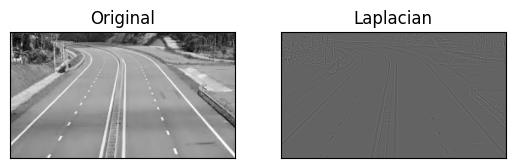

In [21]:
# remove noise
img = cv2.GaussianBlur(img1,(3,3),0)


# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

In [22]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1,0,1],
                    [ -2, 0 , 2],
                    [ -1,0,1]])

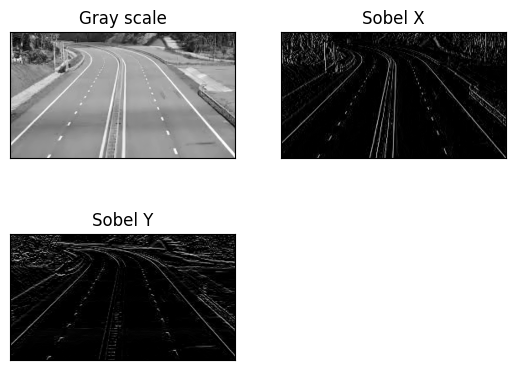

In [23]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(img1, -1, sobel_y)
filtered_image_x = cv2.filter2D(img1, -1, sobel_x)

plt.subplot(2,2,1),plt.imshow(img1,cmap = 'gray')
plt.title('Gray scale'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(filtered_image_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(filtered_image_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()



1. **Sobel Filters**:
   - You apply Sobel filters to the grayscale image (`img1`) to detect edges in both the X and Y directions.
   - The Sobel X filter (`filtered_image_x`) highlights vertical edges, while the Sobel Y filter (`filtered_image_y`) highlights horizontal edges.

2. **Display**:
   - You create a subplot with three images:
     - The original grayscale image (`img1`) is displayed in the first subplot.
     - The Sobel X-filtered image (`filtered_image_x`) is displayed in the second subplot.
     - The Sobel Y-filtered image (`filtered_image_y`) is displayed in the third subplot.



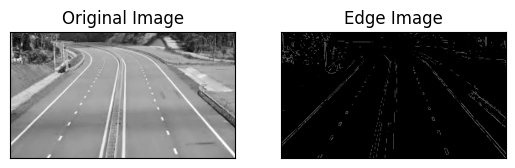

In [24]:
# canny edge detection

edges = cv2.Canny(img,250,250)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([]);

The algorithms used in the provided code snippets are as follows:

1. **Gaussian Blur**:
   - The Gaussian blur is applied using the `cv2.GaussianBlur()` function. It smooths the image by convolving it with a Gaussian kernel, reducing noise and enhancing features.

2. **Laplacian Filter**:
   - The Laplacian filter is applied using the `cv2.Laplacian()` function. It highlights edges and abrupt intensity changes in the image.

3. **Sobel Filters**:
   - The Sobel X and Sobel Y filters are applied using the `cv2.filter2D()` function. These filters detect edges in the horizontal (X) and vertical (Y) directions, respectively.
